In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

<h1><b> Data Analysis </b></h1>

In [12]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [14]:
# Datada null değer var mı kontrol et.
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
# Datada 3 tane object tipinde değer var. Bunları label encoding ile dönüştüreceğiz ileride.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
# Datadaki değerlerin birbirleriyle olan ilişkileri tabloda gözlenmekte
df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


- Yaş arttıkça sağlık masrafı da artıyor.
- BMI değeri arttıkça masraf artıyor.

In [17]:
# Datadaki değerlerin ortalamaları, standart sapmaları
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


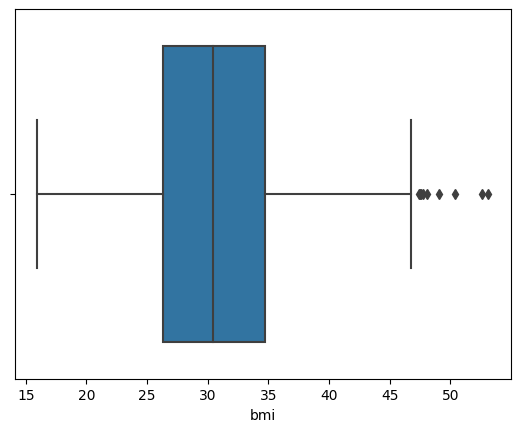

In [18]:
sns.boxplot(x="bmi", data=df);

Yukarıdaki boxplotta sağ kısımda outlier olanlar görülmekte.

In [19]:
smoking_charge_rel = df.groupby("smoker")["charges"].mean()
smoking_charge_rel

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

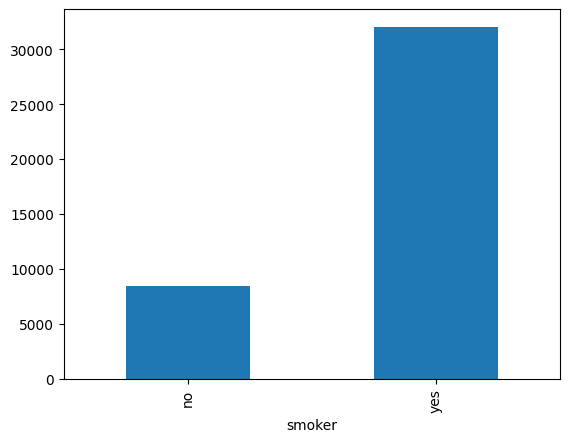

In [20]:
smoking_charge_rel.plot.bar();

Yukarıdaki bar plotta görülebileceği üzere sigara içenlerin ortalama sağlık sigorta masrafı daha yüksek.

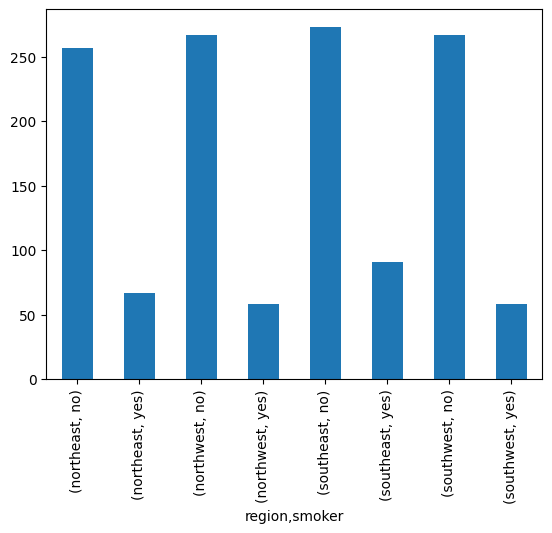

In [21]:
smoking_region_rel = df.groupby("region")["smoker"].value_counts()
smoking_region_rel.plot.bar();

Bölgelere göre sigara içen ve içmeyenlerin dağılımı.

In [22]:
bmi_sex_rel = df.groupby("sex")["bmi"].mean()
bmi_sex_rel

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

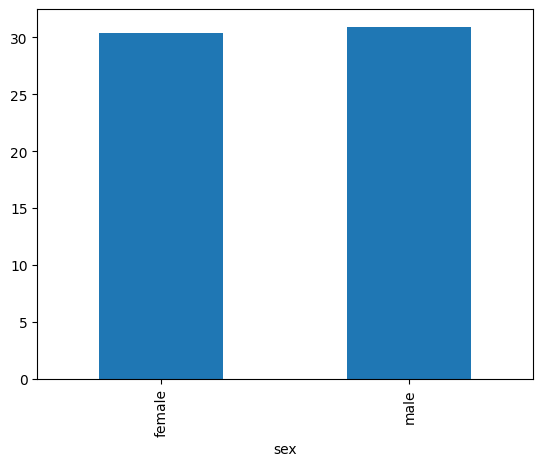

In [23]:
bmi_sex_rel.plot.bar();

İki cinsiyetin BMI değerleri.

In [24]:
region_children_count = df.groupby("region")["children"].sum()
region_children_count

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

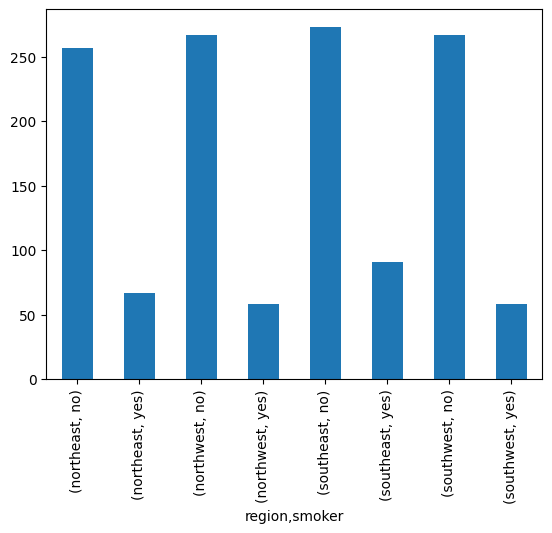

In [25]:
smoking_region_rel.plot.bar();

Grafikte görüleceği üzere en fazla çocuk sayısına sahip olan bölge: Southeast.

<h1><b> Data Preprocessing </b></h1>

In [26]:
# Datadaki object type'ında olan değerleri label encoding ile integer type'a çeviriyoruz
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df["region"] = label_encoder.fit_transform(df["region"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [28]:
# Parametreler ve sonuçları ayırıyoruz
y = df["charges"]
X = df.drop(["charges"], axis=1)

In [29]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [30]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [31]:
# Train ve test gruplarımızı oluşturoruz.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<h1><b> Model Selection </b></h1>

<h2><b>Linear Regression</b></h2>

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
predictions = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

# Modelimizin değruluğunu ölçmek için "Root Mean Square Error" değerini hesaplıyoruz
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

5310.490842014182

In [35]:
comparison = pd.DataFrame({"Actual Charges": y_test, "Predicted Charges": predictions})
comparison

,Actual Charges,Predicted Charges
967,7518.02535,7986.013291
965,4746.34400,5576.741479
379,27000.98473,14366.645063
339,8232.63880,9186.135598
1203,9964.06000,12463.340204
...,...,...
293,2156.75180,2778.033837
337,13937.66650,13382.294270
762,19040.87600,28702.273433
582,6356.27070,13674.742079


<h2><b>Random Forest Regression</b></h2>

In [36]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
predictions_2 = model_2.predict(X_test)
rmse_2 = sqrt(mean_squared_error(y_test, predictions_2))
rmse_2

3901.345302013287

In [38]:
comparison = pd.DataFrame({"Actual Charges": y_test, "Predicted Charges": predictions})
comparison

,Actual Charges,Predicted Charges
967,7518.02535,7986.013291
965,4746.34400,5576.741479
379,27000.98473,14366.645063
339,8232.63880,9186.135598
1203,9964.06000,12463.340204
...,...,...
293,2156.75180,2778.033837
337,13937.66650,13382.294270
762,19040.87600,28702.273433
582,6356.27070,13674.742079


<h2><b>Support Vector Machine</b></h2>

In [39]:
from sklearn.svm import SVR
model_3 = SVR()
model_3.fit(X_train, y_train)

SVR()

In [40]:
predictions_3 = model_3.predict(X_test)
rmse_3 = sqrt(mean_squared_error(y_test, predictions_3))
rmse_3

11613.899041029343

<h2><b>Neural Network</b></h2>

In [48]:
from sklearn.neural_network import MLPRegressor
model_4 = MLPRegressor(hidden_layer_sizes=100, max_iter=10000)
model_4.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=100, max_iter=10000)

In [49]:
predictions_4 = model_4.predict(X_test)
rmse_4 = sqrt(mean_squared_error(y_test, predictions_4))
rmse_4

5357.454618456025

<h1><b> Model Evaluation </b></h1>

<h2><b> Root Mean Squared Error </b></h2>

In [50]:
print(f"Linear Regression için RMSE: {rmse:.2f}")
print(f"Random Forest için RMSE: {rmse_2:.2f}")
print(f"Support Vector Machine için RMSE: {rmse_3:.2f}")
print(f"Neural Network için RMSE: {rmse_4:.2f}")

Linear Regression için RMSE: 5310.49
Random Forest için RMSE: 3901.35
Support Vector Machine için RMSE: 11613.90
Neural Network için RMSE: 5357.45


<h2><b> R2 Score </b></h2>

In [51]:
from sklearn.metrics import r2_score

r2_model_1 = r2_score(y_test, predictions)
r2_model_2 = r2_score(y_test, predictions_2)
r2_model_3 = r2_score(y_test, predictions_3)
r2_model_4 = r2_score(y_test, predictions_4)

print(f"R2 Score for Linear Regression is: {r2_model_1}")
print(f"R2 Score for Random Forest is: {r2_model_2}")
print(f"R2 Score for Support Vector Machine is: {r2_model_3}")
print(f"R2 Score for Neural Network is: {r2_model_4}")

R2 Score for Linear Regression is: 0.7778947958985813
R2 Score for Random Forest is: 0.880127879602945
R2 Score for Support Vector Machine is: -0.062295884366916576
R2 Score for Neural Network is: 0.773949012830832


 Denediğimiz 4 model arasında (Linear Regression, Random Forest, Support Vector Machine,
Neural Network) en iyi sonucu veren (rmse en küçük olan) modeli Random Forest olarak saptadık.
En kötü tahmini ise Support Vector Machine modeli oldu.